In [1]:
pip install --upgrade tensorflow scikit-learn numpy matplotlib

  Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl (8.6 MB)
Using cached matplotlib-3.10.6-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached numpy-2.2.6-cp312-cp312-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scikit-learn━━━━━━━━━━━━ 0/3 [numpy]
    Found existing installation: scikit-learn 1.7.132m0/3 [numpy]
    Uninstalling scikit-learn-1.7.1:━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [scikit-learn]
      Successfully uninstalled scikit-learn-1.7.1━━━━━━━━━━━━━ 1/3 [scikit-learn]
  Attempting uni

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [3]:
# Load the California Housing dataset
cal_data = fetch_california_housing()
X = cal_data.data
y = cal_data.target

print("Data shape:", X.shape)        # Should be (20640, 8)
print("Target shape:", y.shape)      # Should be (20640,)

Data shape: (20640, 8)
Target shape: (20640,)


In [5]:
# Split into train and test first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Further split train data into train and validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Training data shape:", X_train_final.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Training data shape: (13209, 8)
Validation data shape: (3303, 8)
Test data shape: (4128, 8)


In [6]:
scaler = StandardScaler()
scaler.fit(X_train_final)

X_train_scaled = scaler.transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Feature means:", scaler.mean_)
print("Feature variances:", scaler.var_)

Feature means: [ 3.86893364e+00  2.85672647e+01  5.42040408e+00  1.09433536e+00
  1.42691650e+03  3.02944025e+00  3.56468476e+01 -1.19583303e+02]
Feature variances: [3.57143560e+00 1.58482738e+02 4.48993988e+00 1.45205080e-01
 1.29315681e+06 4.70353691e+01 4.55294423e+00 4.02078197e+00]


In [7]:
baseline_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

baseline_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_baseline = baseline_model.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100


/opt/anaconda3/envs/ml-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - loss: 0.8175 - mae: 0.6163 - mse: 0.8175 - val_loss: 0.5284 - val_mae: 0.4908 - val_mse: 0.5284
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.3952 - mae: 0.4456 - mse: 0.3952 - val_loss: 0.3943 - val_mae: 0.4558 - val_mse: 0.3943
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.3651 - mae: 0.4279 - mse: 0.3651 - val_loss: 0.5870 - val_mae: 0.4451 - val_mse: 0.5870
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.3638 - mae: 0.4168 - mse: 0.3638 - val_loss: 0.5086 - val_mae: 0.4337 - val_mse: 0.5086
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.3342 - mae: 0.4058 - mse: 0.3342 - val_loss: 0.3618 - val_mae: 0.4156 - val_mse: 0.3618
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.3277 - mae: 0.3983 - mse: 0.3277 - val_loss: 0.4263 - val_mae: 0.4260 - val_mse: 0.4263
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.3261 - mae: 0.3943 - mse: 0.3

In [8]:
model_bn = keras.Sequential([
    layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(64, activation='linear'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1)
])

model_bn.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_bn = model_bn.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - loss: 0.7165 - mae: 0.6045 - mse: 0.7165 - val_loss: 0.6474 - val_mae: 0.5236 - val_mse: 0.6474
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.4428 - mae: 0.4799 - mse: 0.4428 - val_loss: 0.9916 - val_mae: 0.6114 - val_mse: 0.9916
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.4091 - mae: 0.4610 - mse: 0.4091 - val_loss: 1.5981 - val_mae: 0.4530 - val_mse: 1.5981
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.4036 - mae: 0.4559 - mse: 0.4036 - val_loss: 0.5250 - val_mae: 0.4805 - val_mse: 0.5250
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.3828 - mae: 0.4434 - mse: 0.3828 - val_loss: 0.4708 - val_mae: 0.4537 - val_mse: 0.4708
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.3725 - mae: 0.4365 - mse: 0.3725 - val_loss: 0.8507 - val_mae: 0.5797 - val_mse: 0.8507
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.3663 - mae: 0.430

In [9]:
l2_reg = 1e-4
dropout_rate = 0.3

model_reg = keras.Sequential([
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg),
                 input_shape=(X_train.shape[1],)),
    layers.Dropout(dropout_rate),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dropout(dropout_rate),

    layers.Dense(1)
])

model_reg.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_reg = model_reg.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - loss: 1.2766 - mae: 0.7852 - mse: 1.2687 - val_loss: 0.8826 - val_mae: 0.5300 - val_mse: 0.8747
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.6729 - mae: 0.5750 - mse: 0.6649 - val_loss: 0.6084 - val_mae: 0.4769 - val_mse: 0.6004
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.5908 - mae: 0.5300 - mse: 0.5827 - val_loss: 0.5308 - val_mae: 0.4676 - val_mse: 0.5227
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.5227 - mae: 0.5126 - mse: 0.5146 - val_loss: 0.4885 - val_mae: 0.4590 - val_mse: 0.4802
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.5123 - mae: 0.4951 - mse: 0.5040 - val_loss: 0.4516 - val_mae: 0.4496 - val_mse: 0.4433
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.4744 - mae: 0.4870 - mse: 0.4661 - val_loss: 0.4133 - val_mae: 0.4443 - val_mse: 0.4050
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.4639 - mae: 0.479

In [10]:
print("=== Baseline Model ===")
train_scores = baseline_model.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores   = baseline_model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores[1]:.4f}, Train MSE: {train_scores[2]:.4f}")
print(f"Val   MAE: {val_scores[1]:.4f}, Val   MSE: {val_scores[2]:.4f}")

print("\n=== BatchNorm Model ===")
train_scores_bn = model_bn.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_bn   = model_bn.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_bn[1]:.4f}, Train MSE: {train_scores_bn[2]:.4f}")
print(f"Val   MAE: {val_scores_bn[1]:.4f}, Val   MSE: {val_scores_bn[2]:.4f}")

print("\n=== Regularized Model (L2 + Dropout) ===")
train_scores_reg = model_reg.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_reg   = model_reg.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_reg[1]:.4f}, Train MSE: {train_scores_reg[2]:.4f}")
print(f"Val   MAE: {val_scores_reg[1]:.4f}, Val   MSE: {val_scores_reg[2]:.4f}")

=== Baseline Model ===
Train MAE: 0.3133, Train MSE: 0.2057
Val   MAE: 0.3585, Val   MSE: 0.2739

=== BatchNorm Model ===
Train MAE: 0.4536, Train MSE: 0.4851
Val   MAE: 0.4733, Val   MSE: 0.5831

=== Regularized Model (L2 + Dropout) ===
Train MAE: 0.3483, Train MSE: 0.2582
Val   MAE: 0.3736, Val   MSE: 0.2905


In [11]:
# Evaluate the best model on the test set
test_scores = model_reg.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MAE: {test_scores[1]:.4f}, Test MSE: {test_scores[2]:.4f}")

Test MAE: 0.3630, Test MSE: 0.2794


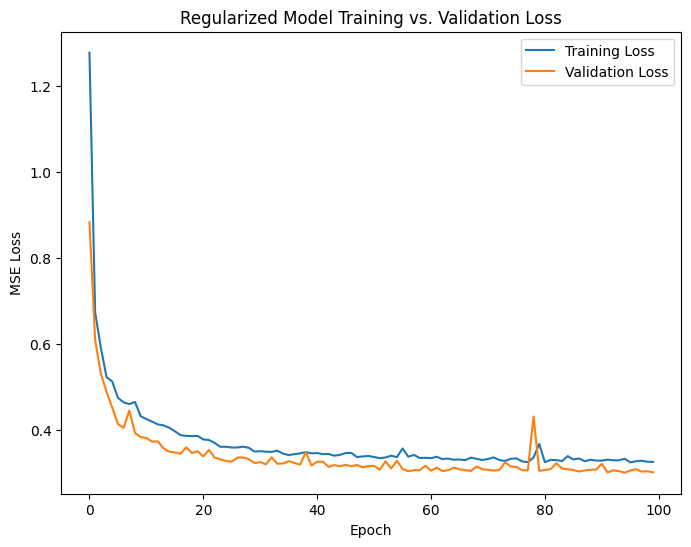

In [12]:
plt.figure(figsize=(8,6))
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Regularized Model Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()